# MIMIC Dataset

In [4]:
# read reflacx dataset

import os 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

from data.constants import SPREADSHEET_FOLDER

In [23]:
# define paths 
physio_file_path = "E:\\physionet.org\\files\\"


# plotting functions
float_num_to_k = lambda num: f"{(float(num)/ 1e+3):.0f}K"

def plot_hist(series, ylabel, color, title=None,figsize=(10, 5),  top_n = None):
    plt.figure(figsize=figsize)

    elements = series.value_counts().sort_values()

    if not top_n is None:
        elements = elements[-1*top_n:]
        

    ax = elements.plot(kind="barh", color=color)

    ax.set_xlabel("Frequency", fontdict={"size": 16, "family": "serif"}, labelpad=15)
    ax.set_ylabel(
        ylabel, fontdict={"size": 16, "family": "serif"}, labelpad=15,
    )

    if not title is None:
        ax.set_title(
            title,
            fontdict={"size": 16, "weight": "bold", "family": "serif"},
            pad=15,
        )

    # tick labels
    ax.set_yticklabels(ax.get_yticklabels() , fontdict={"size": 13, "family": "serif"})

    ax.set_xticklabels( [ flaot_num_to_k(n) for n in list(ax.get_xticks())], fontdict={
        "size":13,
        'family': 'serif'
    })

    return ax


In [22]:
pharmacy_df = pd.read_csv(
    os.path.join(physio_file_path, "mimiciv\\2.0\\hosp\\pharmacy.csv.gz")
)
pharmacy_df.head(5)

c:\Users\mike8\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (16,18,24,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
pharmacy_df["medication"].value_counts()[:15]

Insulin                        652746
Sodium Chloride 0.9%  Flush    544828
Acetaminophen                  464077
Heparin                        425595
Potassium Chloride             399796
Furosemide                     342088
Docusate Sodium                299818
HYDROmorphone (Dilaudid)       290730
Senna                          254228
Metoprolol Tartrate            254111
Ondansetron                    220038
Vancomycin                     189662
Magnesium Sulfate              183281
Bisacodyl                      182296
Aspirin                        153635
Name: medication, dtype: int64

C:\Users\mike8\AppData\Local\Temp/ipykernel_25184/681056857.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ flaot_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Medications in MIMIC-IV'}, xlabel='Frequency', ylabel='Medication'>

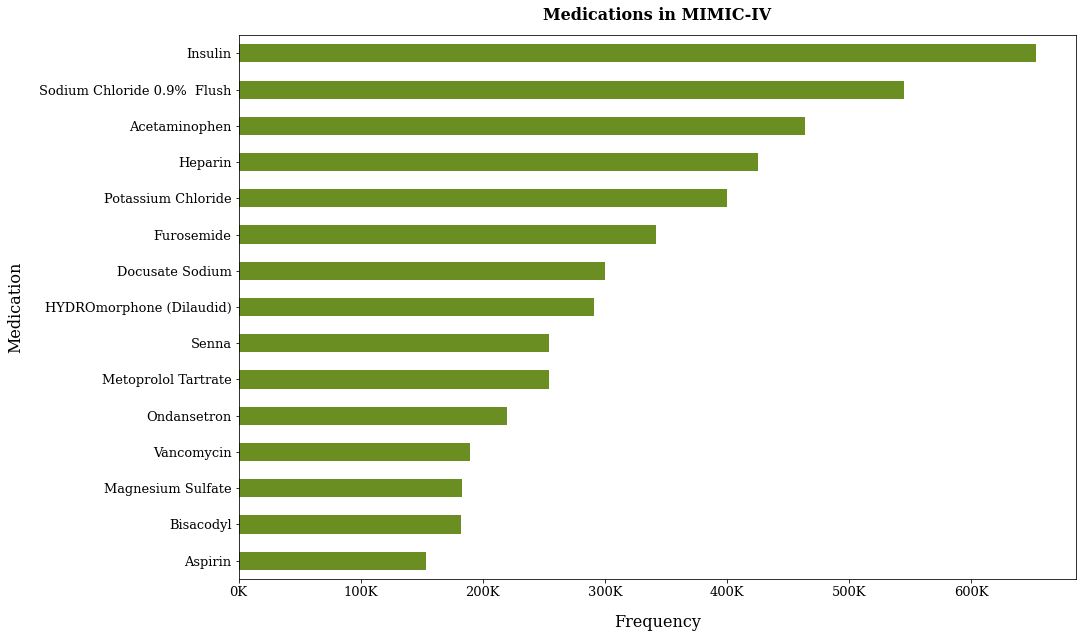

In [57]:
plot_hist(pharmacy_df["medication"], color="olivedrab", ylabel="Medication", title="Medications in MIMIC-IV", figsize=(15, 10), top_n=15)


In [24]:
df_diagnosis = pd.read_csv(os.path.join( physio_file_path, "mimic-iv-ed\\2.0\\ed\\diagnosis.csv.gz"))
diagnoses_icd_df = pd.read_csv(
    os.path.join(physio_file_path, "mimiciv\\2.0\\hosp\\diagnoses_icd.csv.gz")
)
d_icd_df = pd.read_csv(
    os.path.join(physio_file_path, "mimiciv\\2.0\\hosp\\d_icd_diagnoses.csv.gz")
)


# prepare the diagnosing dictionary.
icd_dict = {
    9:{},
    10: {},
}

for idx, i in d_icd_df.iterrows():
    icd_dict[i['icd_version']][i['icd_code']] = i['long_title']



In [68]:
len(d_icd_df)

109775

In [73]:
# make a function for this one.
diagnoses_icd_df["long_title"] = diagnoses_icd_df.apply(lambda i:  icd_dict[i['icd_version']][i['icd_code']], axis=1)

In [39]:
diagnoses_icd_df["long_title"].value_counts()[:5].keys()

Index(['Unspecified essential hypertension',
       'Other and unspecified hyperlipidemia',
       'Essential (primary) hypertension', 'Hyperlipidemia, unspecified',
       'Acute kidney failure, unspecified'],
      dtype='object')

In [44]:
len(diagnoses_icd_df[diagnoses_icd_df["long_title"] == "Unspecified essential hypertension"])

102521

In [37]:
len(diagnoses_icd_df[diagnoses_icd_df["long_title"] == "Unspecified essential hypertension"])/ len(diagnoses_icd_df) 

0.020476008631316402

In [41]:
top_5_k = diagnoses_icd_df["long_title"].value_counts()[:5].keys()

In [42]:
len(diagnoses_icd_df[diagnoses_icd_df["long_title"].isin(top_5_k)])/ len(diagnoses_icd_df) 

0.06504744268091692

In [45]:
len(diagnoses_icd_df[diagnoses_icd_df["long_title"].isin(top_5_k)])

325685

In [88]:

cardiovascular_d = []
for k in diagnoses_icd_df['long_title'].value_counts().keys():

    if "cardiovascular" in k.lower():
        cardiovascular_d.append(k)

In [89]:
len(cardiovascular_d)

29

In [82]:
len(diagnoses_icd_df[(diagnoses_icd_df["long_title"] == "Unspecified essential hypertension") | (diagnoses_icd_df['long_title'] == "Essential (primary) hypertension")])

156914

In [91]:
diagnoses_icd_df['long_title'].value_counts()

Unspecified essential hypertension                                                                                             102521
Other and unspecified hyperlipidemia                                                                                            67342
Essential (primary) hypertension                                                                                                54393
Hyperlipidemia, unspecified                                                                                                     51038
Acute kidney failure, unspecified                                                                                               50391
                                                                                                                                ...  
Contact and allergic dermatitis of eyelid                                                                                           1
Unspecified open wound of abdominal wall, left upper quadrant 

In [85]:
patients = list(diagnoses_icd_df['subject_id'].unique())

In [ ]:
p = patients[0]

diagnoses_icd_df[diagnoses_icd_df["subject_id"] == p]['']

In [92]:
patients_have_both = []
for p in patients:
    p_df = diagnoses_icd_df[diagnoses_icd_df["subject_id"] == p]

    has_diagnoses =  p_df['long_title'].unique()

    has_hypertension = ("Unspecified essential hypertension" in  has_diagnoses) or ("Essential (primary) hypertension" in has_diagnoses)
    has_hyperlipidemia = ("Other and unspecified hyperlipidemia" in has_diagnoses) or ("Hyperlipidemia, unspecified" in has_diagnoses)

    if has_hyperlipidemia and has_hypertension:
        patients_have_both.append(p)

In [97]:
len(patient_df)

315460

In [98]:
len(patients_have_both)

39049

In [96]:
len(patients_have_both) / len(patient_df)

0.12378431496861726

C:\Users\mike8\AppData\Local\Temp/ipykernel_25184/681056857.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ flaot_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Diagnosis in MIMIC-IV'}, xlabel='Frequency', ylabel='Diagnosis'>

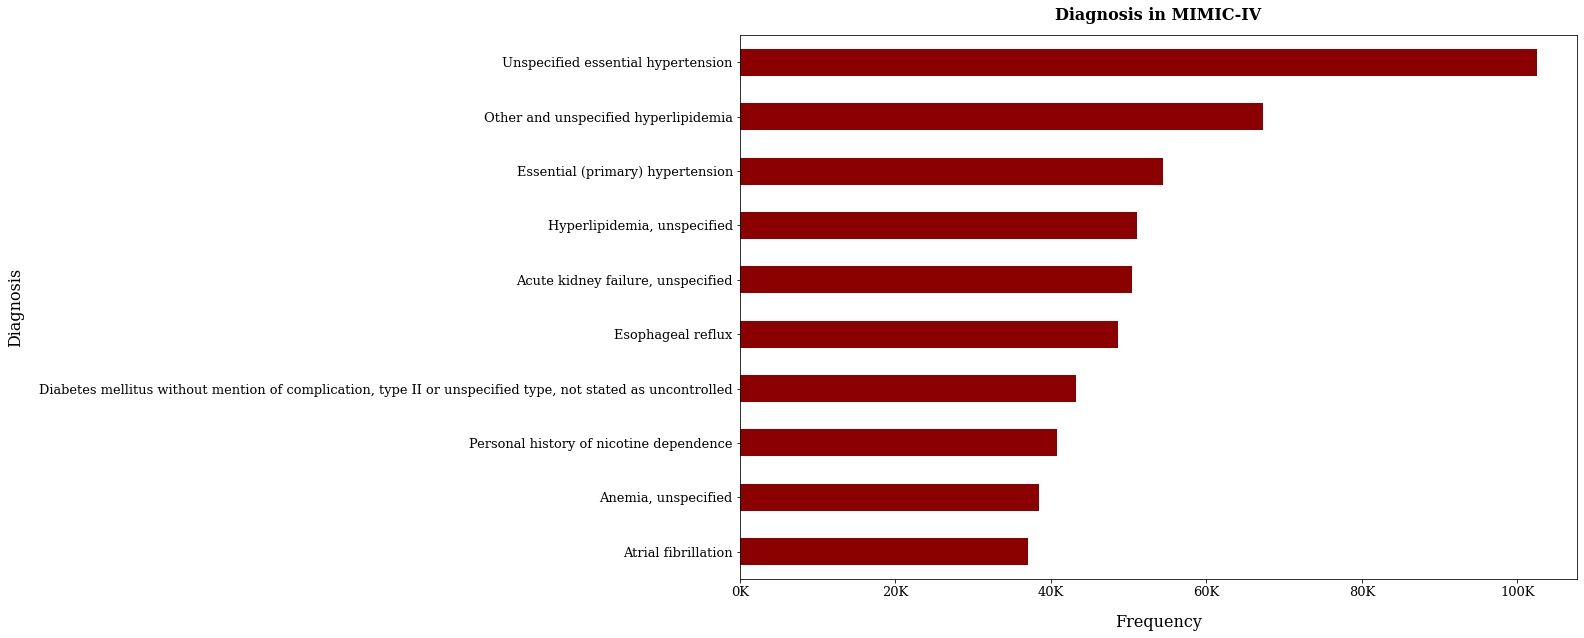

In [75]:
# diagnoses_icd_df["long_title"].value_counts().sort_values()[-5:].plot(kind="barh", color="r")
plot_hist(diagnoses_icd_df["long_title"], color="darkred", ylabel="Diagnosis", title="Diagnosis in MIMIC-IV", figsize=(15, 10), top_n=10)


In [25]:
diagnoses_icd_df["long_title"].value_counts().sort_values(ascending=False)[:5]

Unspecified essential hypertension      102521
Other and unspecified hyperlipidemia     67342
Essential (primary) hypertension         54393
Hyperlipidemia, unspecified              51038
Acute kidney failure, unspecified        50391
Name: long_title, dtype: int64

In [ ]:
diagnoses_icd_df["long_title"] .value_counts()

In [36]:
d_icd_df.head(5)

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A


In [33]:
d_icd_df.icd_version.value_counts()

10    95109
9     14666
Name: icd_version, dtype: int64

In [95]:
cxr_meta_df = pd.read_csv("E:\\physionet.org\\files\\mimic-cxr-jpg\\2.0.0\mimic-cxr-2.0.0-metadata.csv.gz")
triage_df = pd.read_csv("E:\\physionet.org\\files\\mimic-iv-ed\\2.0\\ed\\triage.csv.gz")
ed_stay_df = pd.read_csv("E:\\physionet.org\\files\\mimic-iv-ed\\2.0\\ed\\edstays.csv.gz")
patient_df = pd.read_csv("E:\\physionet.org\\files\\mimiciv\\2.0\\hosp\\patients.csv.gz")
reflacx_df  = pd.concat([pd.read_csv(os.path.join(
    "E:\\physionet.org\\files\\reflacx-xray-localization\\1.0.0\\main_data", f"metadata_phase_{i}.csv")) for i in range(1, 4)])
eye_gaze_df = pd.read_csv("E:\\physionet.org\\files\\egd-cxr\\1.0.0\\master_sheet.csv")
icu_df = pd.read_csv("E:\\physionet.org\\files\\mimiciv\\2.0\\icu\\icustays.csv.gz")

In [10]:
admissions_df = pd.read_csv("E:\\physionet.org\\files\\mimiciv\\2.0\\hosp\\admissions.csv.gz")

In [ ]:
import numpy as np
import datetime
import math


def time_string_to_float(x):
    return float('inf') if type(x) is float and math.isnan(x) else float(x.replace("-", "").replace("/", "").replace(" ", "").replace(":", ""))

def fill_time(time_flaot): 
    zero_in_front_times = 5 - int(np.log10(time_flaot))
    return "0"*zero_in_front_times + str(time_flaot)

def get_datetime_from_float(float_time):
    str_time = str(int(float_time))
    return datetime.datetime(
        year=int(str_time[:4]),
        month=int(str_time[4:6]),
        day=int(str_time[6:8]),
        hour=int(str_time[8:10]),
        minute=int(str_time[8:10]),
        second= int(str_time[12:14]),
    )

[float(str(d) + fill_time(t))
 for d, t in zip(cxr_meta_df['StudyDate'], cxr_meta_df['StudyTime'])]

In [ ]:
admissions_df['admittime_obj'] = admissions_df['admittime'].apply(lambda x: get_datetime_from_float(time_string_to_float(x)))

In [142]:
admissions_df['dischtime_obj'] = admissions_df['dischtime'].apply(lambda x: get_datetime_from_float(time_string_to_float(x)))

In [145]:
d = (admissions_df['dischtime_obj'][0] - admissions_df['admittime_obj'][0])

In [13]:
admissions_df.marital_status.value_counts()

MARRIED     191114
SINGLE      171996
WIDOWED      48334
DIVORCED     33164
Name: marital_status, dtype: int64

In [19]:
admissions_df['marital_status'] == "MARRIED"

0         False
1         False
2         False
3         False
4         False
          ...  
454319    False
454320    False
454321    False
454322    False
454323    False
Name: marital_status, Length: 454324, dtype: bool

In [18]:
admissions_df['language'] == "ENGLISH" 

0         True
1         True
2         True
3         True
4         True
          ... 
454319    True
454320    True
454321    True
454322    True
454323    True
Name: language, Length: 454324, dtype: bool

In [26]:
married_white_english_speaker = admissions_df[(admissions_df['language'] == "ENGLISH") & (admissions_df['marital_status'] == "SINGLE") & (admissions_df["race"] == "WHITE")]

In [27]:
len(married_white_english_speaker)/len(admissions_df) * 100 # 27.81%

21.47784400559953

In [25]:
len(married_white_english_speaker)

126376

In [151]:
admissions_df['duration'] = admissions_df.apply(lambda i: (i.dischtime_obj - i.admittime_obj).days, axis=1)

In [161]:
admissions_df['duration'] .value_counts() [:5].sum()

332838

In [175]:
admissions_df[admissions_df['duration'] < 0]

# And, 116 instances have the discharged time later than admitted time, which can be the input mistakes.

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,admittime_obj,dischtime_obj,duration
2186,10049642,26714941,2177-02-20 03:15:00,2177-02-20 02:30:00,2177-02-20 20:30:00,EW EMER.,EMERGENCY ROOM,DIED,Other,?,NaN,UNKNOWN,2177-02-20 01:15:00,2177-02-20 04:25:00,1,2177-02-20 03:03:00,2177-02-20 02:02:00,-1
3301,10077373,23874669,2187-12-18 19:14:00,2187-12-18 12:22:00,NaN,DIRECT OBSERVATION,EMERGENCY ROOM,NaN,Medicare,ENGLISH,MARRIED,WHITE,2187-12-18 16:27:00,2187-12-19 12:59:00,0,2187-12-18 19:19:00,2187-12-18 12:12:00,-1
5875,10136283,29334858,2163-03-01 20:43:00,2163-03-01 02:32:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2163-03-01 19:22:00,2163-03-02 00:39:00,0,2163-03-01 20:20:00,2163-03-01 02:02:00,-1
11906,10270064,29192733,2175-01-30 11:30:00,2175-01-30 08:00:00,NaN,EW EMER.,PACU,NaN,Other,ENGLISH,MARRIED,UNKNOWN,NaN,NaN,0,2175-01-30 11:11:00,2175-01-30 08:08:00,-1
23300,10531790,28680274,2182-01-03 02:44:00,2182-01-03 00:00:00,2182-01-03 22:08:00,URGENT,TRANSFER FROM HOSPITAL,DIED,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,1,2182-01-03 02:02:00,2182-01-03 00:00:00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449123,19887023,24942188,2128-11-12 09:54:00,2128-11-12 00:00:00,2128-11-12 20:45:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,MARRIED,WHITE,2128-11-12 06:47:00,2128-11-12 10:44:00,1,2128-11-12 09:09:00,2128-11-12 00:00:00,-1
449932,19904685,24196469,2171-12-10 14:49:00,2171-12-10 00:00:00,2171-12-10 19:50:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,MARRIED,WHITE,2171-12-10 11:37:00,2171-12-10 16:10:00,1,2171-12-10 14:14:00,2171-12-10 00:00:00,-1
450480,19914761,22348782,2145-07-10 18:28:00,2145-07-10 00:01:00,2145-07-10 00:01:00,EW EMER.,EMERGENCY ROOM,DIED,Medicare,ENGLISH,SINGLE,WHITE,2145-07-10 15:16:00,2145-07-10 19:43:00,1,2145-07-10 18:18:00,2145-07-10 00:00:00,-1
452896,19966756,29577757,2145-08-13 05:54:00,2145-08-13 04:30:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2145-08-13 01:54:00,2145-08-13 08:45:00,0,2145-08-13 05:05:00,2145-08-13 04:04:00,-1


In [208]:
less_than_one_d = admissions_df['duration'].value_counts()[0]

print(f"{less_than_one_d} ({less_than_one_d/len(admissions_df)*100:.2f}%) instances has the duration less than one day.")

102418 (22.54%) instances has the duration less than one day.


In [209]:
less_than_five_d = admissions_df['duration'].value_counts()[:5].sum()

print(f"And, {less_than_five_d} ({less_than_five_d/len(admissions_df)*100:.2f}%) instances stayed less than 5 days")

And, 332838 (73.26%) instances stayed less than 5 days


In [210]:
more_than_50 = len(admissions_df[admissions_df['duration'] > 50])

print(f"Only have {more_than_50} ({more_than_50 / len(admissions_df)*100:.2f}%) instance stayed longer than 50 days while the maximum stay duration is {admissions_df['duration'].max()} days.")

Only have 1222 (0.27%) instance stayed longer than 50 days while the maximum stay duration is 295 days.


C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/40035203.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ flaot_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


[Text(0.0, 0, '0K'),
 Text(20000.0, 0, '20K'),
 Text(40000.0, 0, '40K'),
 Text(60000.0, 0, '60K'),
 Text(80000.0, 0, '80K'),
 Text(100000.0, 0, '100K'),
 Text(120000.0, 0, '120K'),
 Text(140000.0, 0, '140K'),
 Text(160000.0, 0, '160K'),
 Text(180000.0, 0, '180K')]

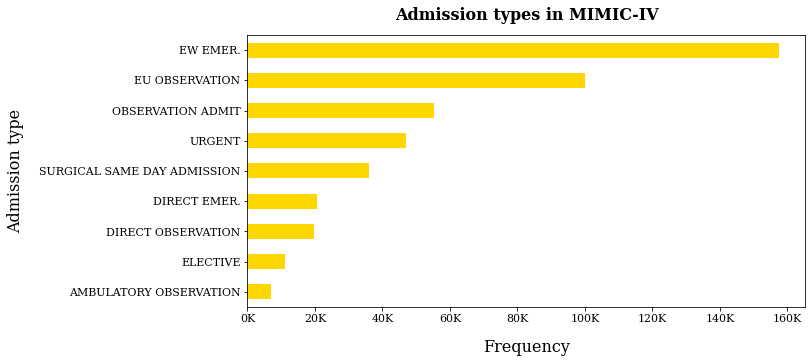

In [232]:
plt.figure(figsize=(10, 5))

ax = admissions_df['admission_type'].value_counts().sort_values().plot(kind="barh", color="gold")
ax.set_xlabel("Frequency", fontdict={"size": 16, "family": "serif"}, labelpad=15)
ax.set_ylabel(
    "Admission type", fontdict={"size": 16, "family": "serif"}, labelpad=15,
)

ax.set_title(
    "Admission types in MIMIC-IV",
    fontdict={"size": 16, "weight": "bold", "family": "serif"},
    pad=15,
)

# tick labels
ax.set_yticklabels(ax.get_yticklabels() , fontdict={"size": 11, "family": "serif"})

ax.set_xticklabels( [ flaot_num_to_k(n) for n in list(ax.get_xticks())], fontdict={
    "size":11,
    'family': 'serif'
})



In [223]:
admissions_df.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'marital_status', 'race', 'edregtime',
       'edouttime', 'hospital_expire_flag', 'admittime_obj', 'dischtime_obj',
       'duration'],
      dtype='object')

C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/619866497.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ flaot_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Marital status in MIMIC-IV'}, xlabel='Frequency', ylabel='Marital Status'>

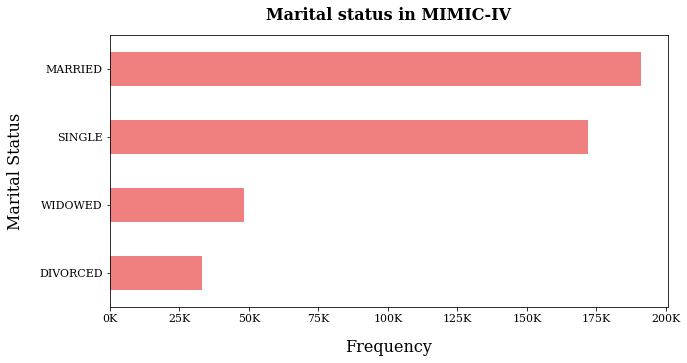

In [238]:
plot_hist(admissions_df.marital_status, color="lightcoral", ylabel="Marital Status", title="Marital status in MIMIC-IV",)

C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/3857617862.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ flaot_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Ethnicity in MIMIC-IV'}, xlabel='Frequency', ylabel='Ethnicity'>

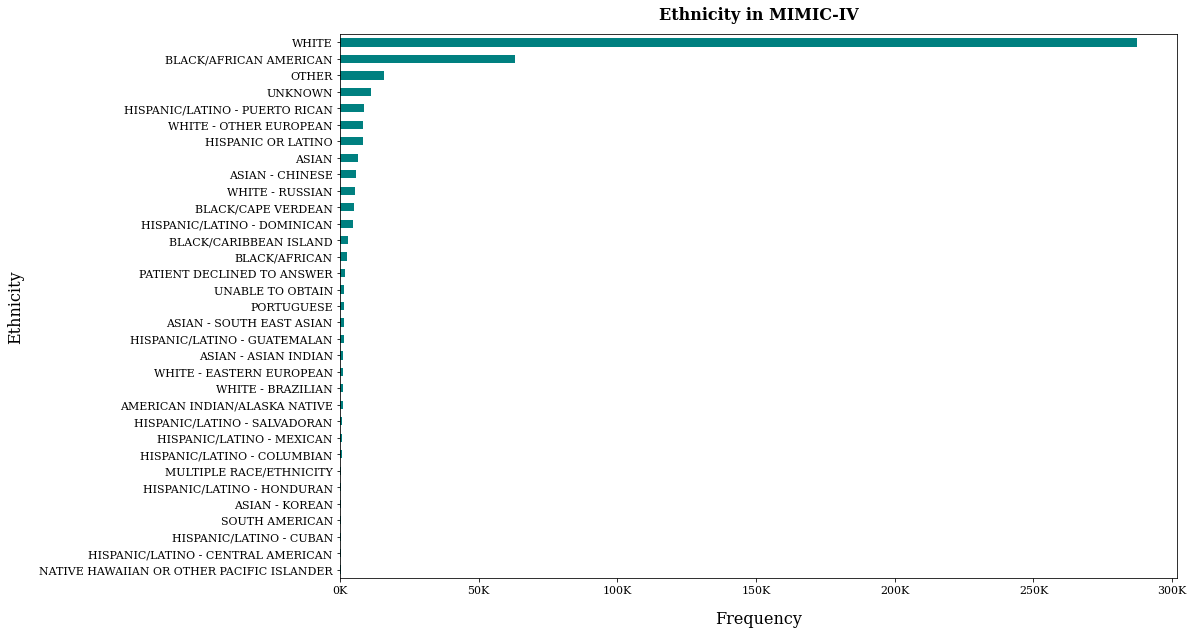

In [255]:
plot_hist(admissions_df.race, color="teal", ylabel="Ethnicity", title="Ethnicity in MIMIC-IV", figsize=(15, 10))

C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/3857617862.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ flaot_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Insurance type in MIMIC-IV'}, xlabel='Frequency', ylabel='Insurance'>

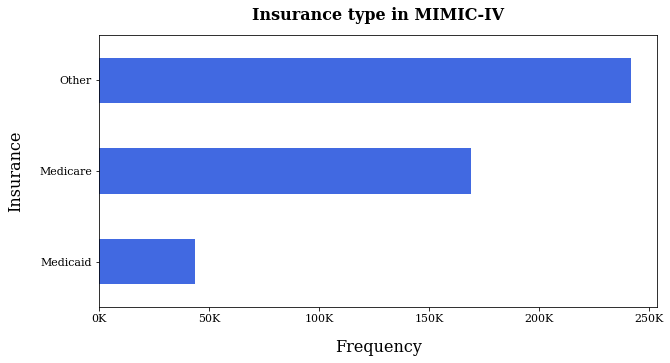

In [259]:
plot_hist(admissions_df.insurance, color="royalblue", ylabel="Insurance", title="Insurance type in MIMIC-IV", figsize=(10, 5))

In [261]:
admissions_df.language.value_counts()

ENGLISH    409153
?           45171
Name: language, dtype: int64

C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/3857617862.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ flaot_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Language of patients in MIMIC-IV'}, xlabel='Frequency', ylabel='Language'>

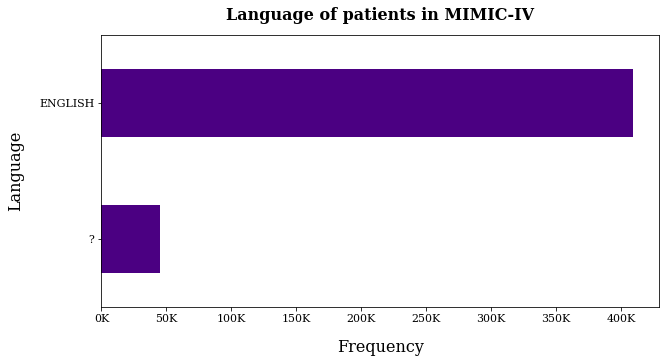

In [260]:
plot_hist(admissions_df.language, color="indigo", ylabel="Language", title="Language of patients in MIMIC-IV", figsize=(10, 5))

C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/3763803598.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{t:.0f}" for t in ax.get_xticks()] , fontdict={"size": 12, "family": "serif"})
C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/3763803598.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( [ flaot_num_to_k(n) for n in list(ax.get_yticks())], fontdict={


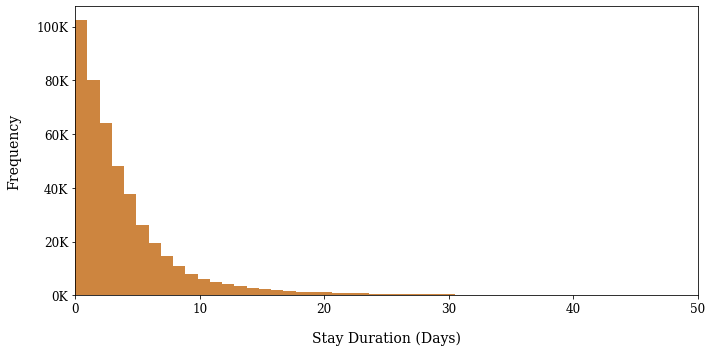

In [196]:

from turtle import color



plt.figure(figsize=(10, 5))
plt.xlim([0, 50])

ax = admissions_df[admissions_df['duration'] >=
 0]['duration'].hist(bins=300, color="peru")



# ax = (
#     patient_df["anchor_age"]
#     # .value_counts()
#     # .sort_values()
#     .plot(kind="hist", color="gold")
# )

# ax.set_title(
#     " demographics in MIMIC-IV",
#     fontdict={"size": 16, "weight": "bold", "family": "serif"},
#     pad=15,
# )
ax.grid(False)

# labels
ax.set_xlabel("Stay Duration (Days)", fontdict={"size": 14, "family": "serif"}, labelpad=15)
ax.set_ylabel(
    "Frequency", fontdict={"size": 14, "family": "serif"}, labelpad=15,
)


# # ticks
# ax.set_xticks(ax.get_xticks(), fontdict={"size": 12, "family": "serif"})
# ax.set_yticks(ax.get_yticks(), fontdict={"size": 12, "family": "serif"})

# tick labels
ax.set_xticklabels([f"{t:.0f}" for t in ax.get_xticks()] , fontdict={"size": 12, "family": "serif"})

ax.set_yticklabels( [ flaot_num_to_k(n) for n in list(ax.get_yticks())], fontdict={
    "size":12,
    'family': 'serif'
})


plt.tight_layout()


In [148]:
admissions_df['dischtime'] 

0         2180-05-07 17:15:00
1         2180-06-27 18:49:00
2         2180-08-07 17:50:00
3         2180-07-25 17:55:00
4         2160-03-04 06:26:00
                 ...         
454319    2149-01-18 17:00:00
454320    2147-08-04 18:10:00
454321    2164-09-17 13:42:00
454322    2164-07-28 12:15:00
454323    2145-11-11 12:57:00
Name: dischtime, Length: 454324, dtype: object

In [138]:
admissions_df['admittime'] 

0         2180-05-06 22:23:00
1         2180-06-26 18:27:00
2         2180-08-05 23:44:00
3         2180-07-23 12:35:00
4         2160-03-03 23:16:00
                 ...         
454319    2149-01-08 16:44:00
454320    2147-07-18 16:23:00
454321    2164-09-10 13:47:00
454322    2164-07-25 00:27:00
454323    2145-11-02 21:38:00
Name: admittime, Length: 454324, dtype: object

In [15]:
patient_df.columns

Index(['subject_id', 'gender', 'anchor_age', 'anchor_year',
       'anchor_year_group', 'dod'],
      dtype='object')

C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/3602029036.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict={"size": 12, "family": "serif"})
C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/3602029036.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( [  flaot_num_to_k(n) for n in list(ax.get_yticks())], fontdict={


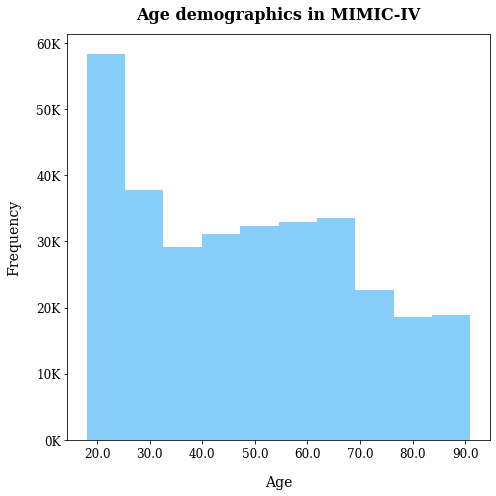

In [182]:
plt.figure(figsize=(7, 7))
# ax = patient_df['gender'].hist(alpha=1, color="darkviolet")
ax = (
    patient_df["anchor_age"]
    # .value_counts()
    # .sort_values()
    .plot(kind="hist", color="lightskyblue")
)

ax.set_title(
    "Age demographics in MIMIC-IV",
    fontdict={"size": 16, "weight": "bold", "family": "serif"},
    pad=15,
)
ax.grid(False)

# labels
ax.set_xlabel("Age", fontdict={"size": 14, "family": "serif"}, labelpad=15)
ax.set_ylabel(
    "Frequency", fontdict={"size": 14, "family": "serif"}, labelpad=15,
)


# # ticks
# ax.set_xticks(ax.get_xticks(), fontdict={"size": 12, "family": "serif"})
# ax.set_yticks(ax.get_yticks(), fontdict={"size": 12, "family": "serif"})

# tick labels
ax.set_xticklabels(ax.get_xticks(), fontdict={"size": 12, "family": "serif"})

ax.set_yticklabels( [  flaot_num_to_k(n) for n in list(ax.get_yticks())], fontdict={
    "size":12,
    'family': 'serif'
})




plt.tight_layout()


In [78]:
ax.get_yticklabels()

[Text(0, 0.0, '0'),
 Text(0, 20000.0, '20000'),
 Text(0, 40000.0, '40000'),
 Text(0, 60000.0, '60000'),
 Text(0, 80000.0, '80000'),
 Text(0, 100000.0, '100000'),
 Text(0, 120000.0, '120000'),
 Text(0, 140000.0, '140000'),
 Text(0, 160000.0, '160000'),
 Text(0, 180000.0, '180000')]

In [90]:
1e+3

1000.0

In [97]:
flaot_num_to_k(5000)

'5K'

In [125]:
patient_df['gender'].value_counts()["M"] / len(patient_df)

0.47093450833703165

In [127]:
patient_df['gender'].value_counts()["F"] 

166899

In [ ]:
52.90% F  vs 0.4709% M 

C:\Users\mike8\AppData\Local\Temp/ipykernel_2940/520816601.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( [  flaot_num_to_k(n) for n in list(ax.get_yticks())], fontdict={


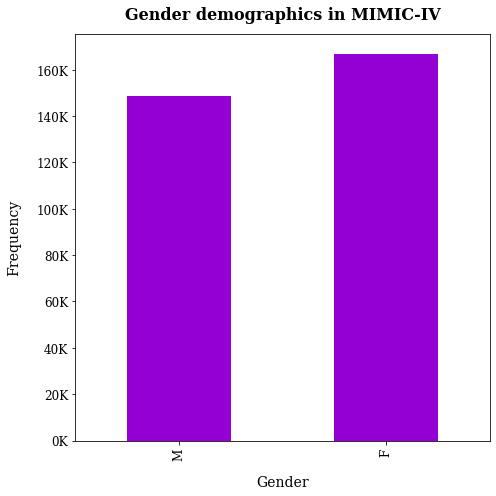

In [117]:
plt.figure(figsize=(7, 7))
# ax = patient_df['gender'].hist(alpha=1, color="darkviolet")
ax = (
    patient_df["gender"]
    .value_counts()
    .sort_values()
    .plot(kind="bar", color="darkviolet")
)

ax.set_title(
    "Gender demographics in MIMIC-IV",
    fontdict={"size": 16, "weight": "bold", "family": "serif"},
    pad=15,
)
ax.grid(False)

# labels
ax.set_xlabel("Gender", fontdict={"size": 14, "family": "serif"}, labelpad=15)
ax.set_ylabel(
    "Frequency", fontdict={"size": 14, "family": "serif"}, labelpad=15,
)


# # ticks
# ax.set_xticks(ax.get_xticks(), fontdict={"size": 12, "family": "serif"})
# ax.set_yticks(ax.get_yticks(), fontdict={"size": 12, "family": "serif"})

# tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontdict={"size": 12, "family": "serif"})

ax.set_yticklabels( [  flaot_num_to_k(n) for n in list(ax.get_yticks())], fontdict={
    "size":12,
    'family': 'serif'
})




plt.tight_layout()


In [7]:
len(triage_df['subject_id'].unique()) # triage table contain this much patients

216373

In [8]:
len(cxr_meta_df['subject_id'].unique()) # cxr contain this much patients

65379

In [9]:
len(ed_stay_df['subject_id'].unique()) # ED contain this much patients, it's the same as triage table.

216373

In [10]:
len(cxr_meta_df['subject_id'].unique())  / len(triage_df['subject_id'].unique()) 

0.30215877212036624

In [45]:
icu_df.head(5)

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588


In [50]:
triage_patients = triage_df['subject_id'].unique()
reflacx_patients = reflacx_df['subject_id'].unique()
cxr_patients = cxr_meta_df['subject_id'].unique()
mimic_patients = patient_df['subject_id'].unique()
eye_gaze_patients = eye_gaze_df['patient_id'].unique()
icu_patients = icu_df["subject_id"].unique()

In [48]:
# triage_stays = triage_df['stay_id'].unique()
# reflacx_stays = reflacx_df['stay_id'].unique()
# cxr_stays = cxr_meta_df['stay_id'].unique()
# mimic_stays = patient_df['stay_id'].unique()
# eye_gaze_stays = eye_gaze_df['stay_id'].unique()

In [13]:
from matplotlib_venn import venn3, venn2

<Figure size 504x504 with 0 Axes>

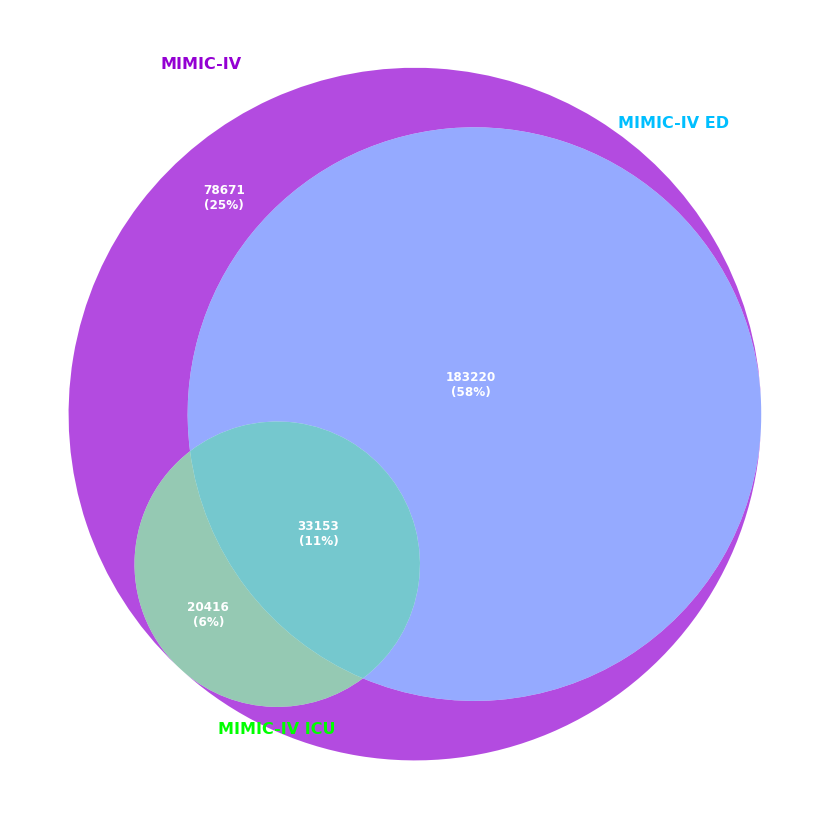

<Figure size 504x504 with 0 Axes>

In [83]:
sets = [set(mimic_patients), set(triage_patients), set(icu_patients)]
colors = ["darkviolet", "deepskyblue", "lime"] # skyblue, purple
labels = ["MIMIC-IV", "MIMIC-IV ED", "MIMIC-IV ICU"]
# colors = ['purple', 'skyblue']

total = len(set(mimic_patients).union(set(triage_patients)).union(icu_patients))

plt.figure(figsize=(15, 15))
ax = plt.gca()
v = venn3(
    subsets=sets,
    set_labels=labels,
    ax=ax,
    set_colors=colors,
    alpha=0.7,
    subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")" if not x==0 else""
    # subset_label_formatter=lambda x: f"{(x/total):1.0%}",
)
i = 0
for text in v.set_labels:
    if not text is None:
        text.set_color(colors[i])
        i += 1
        text.set_fontsize(16)
        text.set_fontweight("bold")

v.subset_labels[0]._x -= 0.14

for text in v.subset_labels:
    if not text is None:
        text.set_color("white")
        text.set_fontsize(12)
        text.set_fontweight("bold")



plt.figure(figsize=(7, 7))
# venn2([set(mimic_patients), set(triage_patients)], set_labels=("MIMIC-IV", "MIMIC-IV ED"), set_colors=('purple', 'skyblue'), alpha=0.7)


VennRegionException: Invalid configuration of circular regions (holes are not supported).

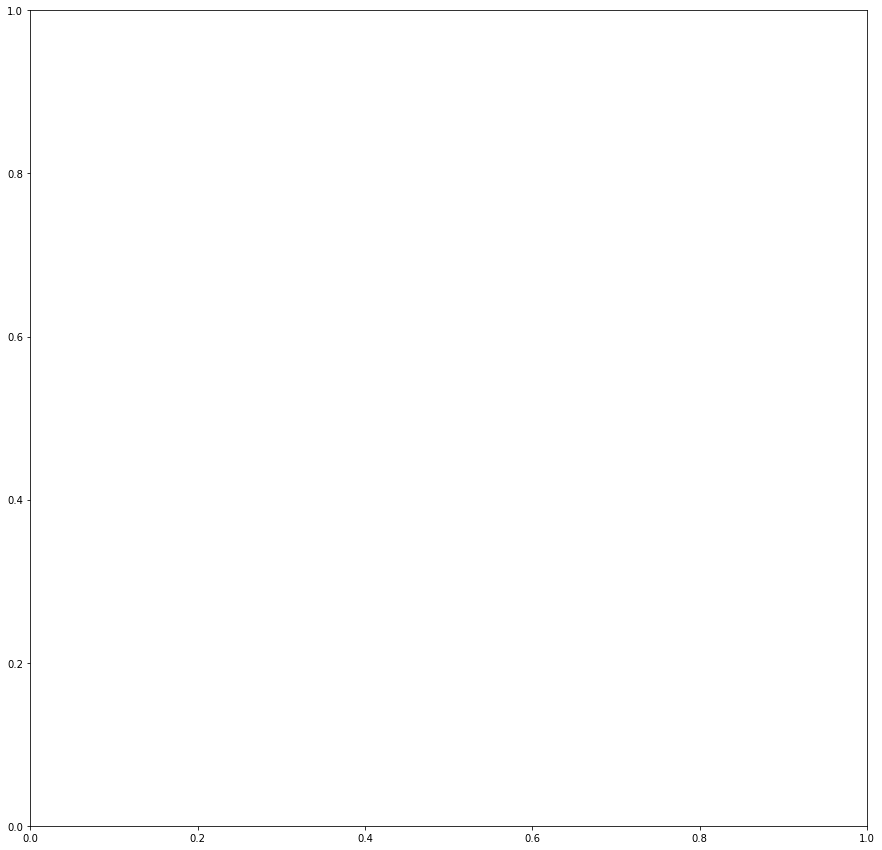

In [85]:
sets = [set(mimic_patients), set(triage_patients), set(cxr_patients)]
colors = ["darkviolet", "deepskyblue", "lime"]
labels = ["MIMIC-IV", "MIMIC-IV ED", "MIMIC-CXR"]
# colors = ['purple', 'skyblue']

total = len(set(mimic_patients).union(set(triage_patients)).union(cxr_patients))

plt.figure(figsize=(15, 15))
ax = plt.gca()
v = venn3(
    subsets=sets,
    set_labels=labels,
    ax=ax,
    set_colors=colors,
    alpha=0.7,
    subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")" if not x==0 else""
    # subset_label_formatter=lambda x: f"{(x/total):1.0%}",
)
i = 0
for text in v.set_labels:
    if not text is None:
        text.set_color(colors[i])
        i += 1
        text.set_fontsize(16)
        text.set_fontweight("bold")

v.subset_labels[0]._x -= 0.14

for text in v.subset_labels:
    if not text is None:
        text.set_color("white")
        text.set_fontsize(12)
        text.set_fontweight("bold")



plt.figure(figsize=(7, 7))
# venn2([set(mimic_patients), set(triage_patients)], set_labels=("MIMIC-IV", "MIMIC-IV ED"), set_colors=('purple', 'skyblue'), alpha=0.7)


<Figure size 504x504 with 0 Axes>

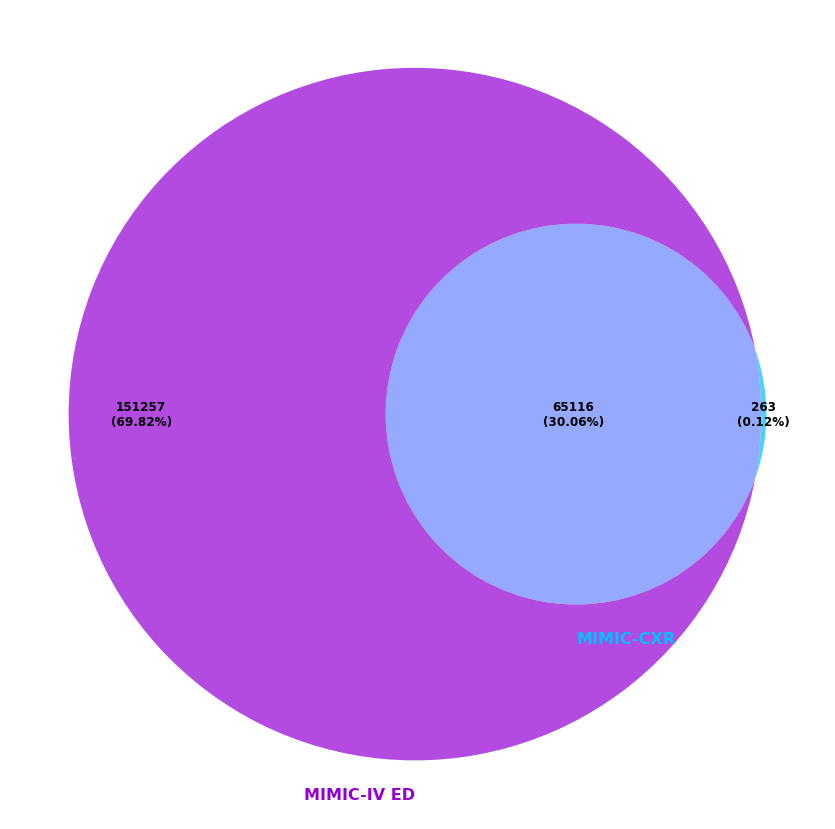

<Figure size 504x504 with 0 Axes>

In [92]:
sets = [set(triage_patients), set(cxr_patients)]
colors = ["darkviolet", "deepskyblue"]
labels = ["MIMIC-IV ED", "MIMIC-CXR"]
# colors = ['purple', 'skyblue']

total = len(set(triage_patients).union(set(cxr_patients)))

plt.figure(figsize=(15, 15))
ax = plt.gca()
v = venn2(
    subsets=sets,
    set_labels=labels,
    ax=ax,
    set_colors=colors,
    alpha=0.7,
    subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.2%}" + ")" if not x==0 else""
    # subset_label_formatter=lambda x: f"{(x/total):1.0%}",
)
i = 0
for text in v.set_labels:
    if not text is None:
        text.set_color(colors[i])
        i += 1
        text.set_fontsize(16)
        text.set_fontweight("bold")

v.subset_labels[0]._x -= 0.14

for text in v.subset_labels:
    if not text is None:
        # text.set_color("white")
        text.set_fontsize(12)
        text.set_fontweight("bold")



plt.figure(figsize=(7, 7))
# venn2([set(mimic_patients), set(triage_patients)], set_labels=("MIMIC-IV", "MIMIC-IV ED"), set_colors=('purple', 'skyblue'), alpha=0.7)


<Figure size 504x504 with 0 Axes>

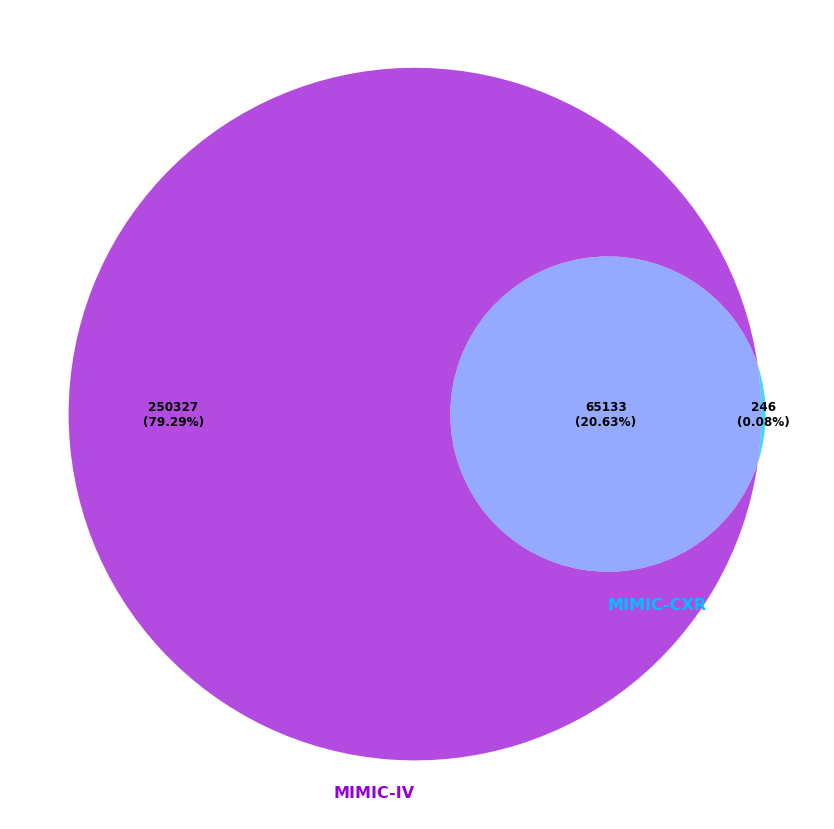

<Figure size 504x504 with 0 Axes>

In [93]:
sets = [set(mimic_patients), set(cxr_patients)]
colors = ["darkviolet", "deepskyblue"]
labels = ["MIMIC-IV", "MIMIC-CXR"]
# colors = ['purple', 'skyblue']

total = len(set(mimic_patients).union(set(cxr_patients)))

plt.figure(figsize=(15, 15))
ax = plt.gca()
v = venn2(
    subsets=sets,
    set_labels=labels,
    ax=ax,
    set_colors=colors,
    alpha=0.7,
    subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.2%}" + ")" if not x==0 else""
    # subset_label_formatter=lambda x: f"{(x/total):1.0%}",
)
i = 0
for text in v.set_labels:
    if not text is None:
        text.set_color(colors[i])
        i += 1
        text.set_fontsize(16)
        text.set_fontweight("bold")

v.subset_labels[0]._x -= 0.14

for text in v.subset_labels:
    if not text is None:
        # text.set_color("white")
        text.set_fontsize(12)
        text.set_fontweight("bold")



plt.figure(figsize=(7, 7))
# venn2([set(mimic_patients), set(triage_patients)], set_labels=("MIMIC-IV", "MIMIC-IV ED"), set_colors=('purple', 'skyblue'), alpha=0.7)


In [78]:
from matplotlib.text import Text

In [34]:
v.set_labels

[Text(-0.039477711719668275, -0.6157618390891018, 'MIMIC-IV'),
 Text(0.05755634454893425, -0.5188277828204992, 'MIMIC-IV ED')]

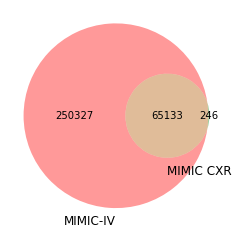

In [14]:
venn2([set(mimic_patients), set(cxr_patients)], set_labels=("MIMIC-IV", "MIMIC CXR"))

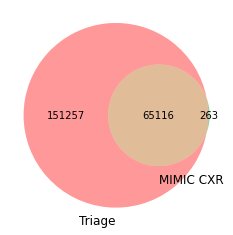

In [75]:
venn2([set(triage_patients), set(cxr_patients)], set_labels=("Triage", "MIMIC CXR"))

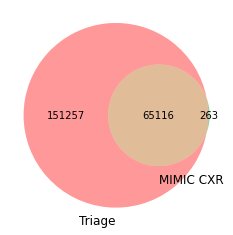

In [76]:
venn2([set(triage_patients), set(cxr_patients)], set_labels=("Triage", "MIMIC CXR"))

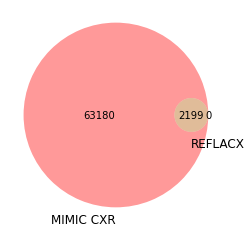

In [77]:
venn2([set(cxr_patients), set(reflacx_patients)], set_labels=("MIMIC CXR", "REFLACX"))

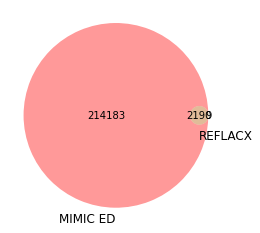

In [79]:
venn2([set(triage_patients), set(reflacx_patients)], set_labels=("MIMIC ED", "REFLACX"))

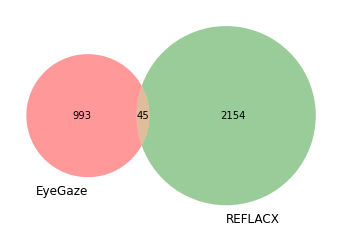

In [189]:
venn2([set(eye_gaze_patients), set(reflacx_patients)], set_labels=("EyeGaze", "REFLACX"))

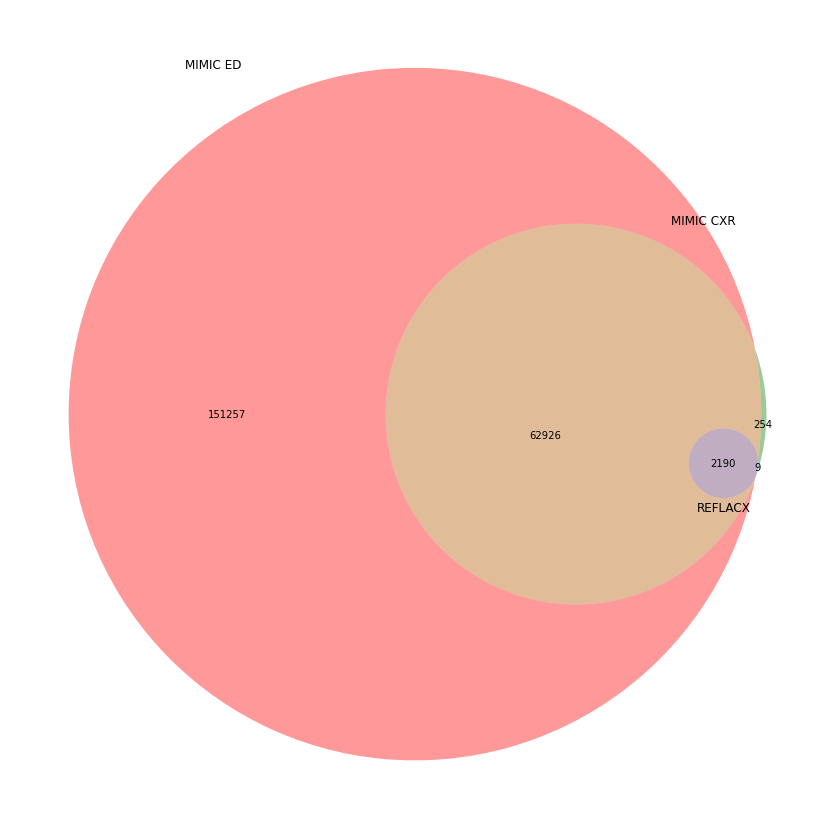

In [119]:
plt.figure(figsize=(15, 15))

venn3([set(triage_patients), set(cxr_patients), set(reflacx_patients)], set_labels=("MIMIC ED", "MIMIC CXR", "REFLACX"))

In [30]:
not_in_p = []
for p in reflacx_patients:
    if not p in triage_patients:
        not_in_p.append(p)
    



In [31]:
len(not_in_p)

9

In [18]:
venn3([set(mimic_patients), set(cxr_patients), set(triage_patients)])

c:\Users\mike8\anaconda3\envs\pytorch\lib\site-packages\matplotlib_venn\_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


VennRegionException: Invalid configuration of circular regions (holes are not supported).

In [16]:
cxr_meta_df

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),lateral,Erect
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
377105,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,19999733,57132437,CHEST (PA AND LAT),PA,3056,2544,21520708,224550.171,CHEST (PA AND LAT),postero-anterior,Erect
377106,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,19999733,57132437,CHEST (PA AND LAT),LATERAL,3056,2544,21520708,224550.171,CHEST (PA AND LAT),lateral,Erect
377107,58766883-376a15ce-3b323a28-6af950a0-16b793bd,19999987,55368167,CHEST (PORTABLE AP),AP,2544,3056,21451104,51448.218,CHEST (PORTABLE AP),antero-posterior,Erect
377108,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,19999987,58621812,CHEST (PORTABLE AP),AP,3056,2544,21451102,202809.234,CHEST (PORTABLE AP),antero-posterior,Erect


In [40]:
cxr_meta_df = pd.read_csv("E:\\physionet.org\\files\\mimic-cxr-jpg\\2.0.0\mimic-cxr-2.0.0-metadata.csv.gz")

cxr_meta_df['StudyDateTime']  = [float(str(d) + fill_time(t))
 for d, t in zip(cxr_meta_df['StudyDate'], cxr_meta_df['StudyTime'])]


# cxr_meta_df['StudyDateTime']  = [float(str(d) + str(t))
#  for d, t in zip(cxr_meta_df['StudyDate'], cxr_meta_df['StudyTime'])]

# Initialise stay_id
cxr_meta_df['stay_id'] = None



ed_stay_df['intime_float'] = ed_stay_df.intime.apply(time_string_to_float)
ed_stay_df['outtime_float'] = ed_stay_df.outtime.apply(time_string_to_float)

In [41]:
all_dicom_id_in_reflacx = list(reflacx_df['dicom_id'])
cxr_meta_df['in_reflacx'] = cxr_meta_df["dicom_id"].isin(all_dicom_id_in_reflacx)

In [43]:
from tqdm import tqdm

In [44]:
out_of_stay_range_but_only_have_one = []
cxr_cannot_find_stay = []
has_patient_match_only = []
has_multiple_match  =[]
in_days = []

with tqdm(total= len(cxr_meta_df)) as pbar:
    for idx, cxr_meta_instance in cxr_meta_df.iterrows():
        dicom_id = cxr_meta_instance['dicom_id']
        
        study_time = cxr_meta_instance["StudyDateTime"]

        patient_match = ed_stay_df[
            (ed_stay_df.subject_id == cxr_meta_instance.subject_id)  
        ]

        # if (len(patient_match) == 1 ):
        #     ed_stay_time_match = patient_match
        # else:
            # if (len(patient_match) > 0):
        ed_stay_time_match = patient_match[
            (patient_match.intime_float < study_time) &
            (patient_match.outtime_float > study_time)
        ]

        if (len(ed_stay_time_match) == 1):
            stay_id = ed_stay_time_match.iloc[0]['stay_id']
            cxr_meta_df.at[idx,"stay_id"] = stay_id
            # out_of_stay_range_but_only_have_one.append(cxr_meta_df)

        elif (len(ed_stay_time_match) > 1):
            # ed_stay_time_match
            # raise StopIteration(f"Has multiple match in {idx}")
            has_multiple_match.append(cxr_meta_instance)
            #     ## we find the closest.

        elif (len(ed_stay_time_match) == 0) and len(patient_match) > 0:
            # raise StopIteration(f"Has patient match only {idx}")

            cxr_time = get_datetime_from_float(cxr_meta_instance['StudyDateTime'])
            patient_match["intime_obj"] = patient_match.intime_float.apply(get_datetime_from_float)
            patient_match["outtime_obj"] = patient_match.outtime_float.apply(get_datetime_from_float)

            # calculate the time diff here.
            patient_match["intime_diff"] =  patient_match["intime_obj"].apply(lambda x: abs((x- cxr_time).days))
            patient_match["outtime_diff"] = patient_match['intime_obj'].apply(lambda x: abs((x- cxr_time).days))
            
            # get the closest 
            patient_match["min_diff"] = patient_match[["intime_diff", "outtime_diff"]].min(axis=1)

            patient_match.sort_values("min_diff", ascending=True, axis=0, inplace=True)

            # check 1st instance and set limitation here:
            if (patient_match.iloc[0]['min_diff'] <= 7):
                in_days.append(cxr_meta_instance)
                cxr_meta_df.at[idx,"stay_id"] = patient_match.iloc[0]['stay_id']

            has_patient_match_only.append(cxr_meta_instance)
        else:
            # print(f"Having problem with {dicom_id} CXR iamge, it has {len(ed_stay_time_match)} matches.")

            # raise StopIteration(f"Can't find stay_id in #{idx} instance")
            cxr_cannot_find_stay.append(cxr_meta_instance)

        pbar.update(1)

  0%|          | 1/377110 [00:00<22:19:03,  4.69it/s]C:\Users\mike8\AppData\Local\Temp/ipykernel_29684/994547826.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_match["intime_obj"] = patient_match.intime_float.apply(get_datetime_from_float)
C:\Users\mike8\AppData\Local\Temp/ipykernel_29684/994547826.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_match["outtime_obj"] = patient_match.outtime_float.apply(get_datetime_from_float)
C:\Users\mike8\AppData\Local\Temp/ipykernel_29684/99454

In [45]:
len(in_days) 

83592

In [46]:
len(cxr_meta_df[cxr_meta_df.stay_id.isnull()])

123453

In [47]:
len(cxr_meta_df[cxr_meta_df.stay_id.isnull()])/ len(cxr_meta_df)

0.3273660205245154

In [48]:
len(cxr_meta_df[cxr_meta_df.in_reflacx & cxr_meta_df.stay_id.isnull()])

876

In [49]:
len(cxr_meta_df[cxr_meta_df.in_reflacx & cxr_meta_df.stay_id.isnull()])/ len(cxr_meta_df[cxr_meta_df.in_reflacx])

0.3348623853211009

In [60]:
# 1 day -> 24532
# 3 days -> 52597
# 7 days -> 

40337

In [93]:
len(has_patient_match_only) - len(in_days) 


153171

In [81]:
(len(has_patient_match_only) - len(in_days) )/len(cxr_meta_df)

0.40617061334889026

In [88]:
len(has_patient_match_only)

205768

In [91]:
in_days_df = pd.concat(in_days, axis=1).transpose()
in_days_df[in_days_df.in_reflacx & in_days_df.stay_id.isnull()] 

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,StudyDateTime,stay_id,in_reflacx
1316,d98be0d5-a648e485-4473a3ef-7762b3ef-2d70507e,10028159,56342713,CHEST (PORTABLE AP),AP,3056,2544,21130413,193441.437,CHEST (PORTABLE AP),antero-posterior,Erect,21130413193441.4375,None,True
7787,2f1c35dd-87dba75e-8e130c33-fa4599a2-b2e62843,10216556,58133454,CHEST (PORTABLE AP),AP,3056,2544,21310616,74908.984,CHEST (PORTABLE AP),antero-posterior,Erect,21310616074908.984375,None,True
14302,991b0632-4aca947d-ac4cddaa-7da4b84e-633c2002,10385501,50300236,CHEST (PORTABLE AP),AP,2544,3056,21680517,64546.015,CHEST (PORTABLE AP),antero-posterior,Erect,21680517064546.015625,None,True
18304,2e0e4c28-77275236-9695b5f1-bedff2d6-f816e6f7,10500792,52823815,CHEST (PORTABLE AP),AP,2611,2539,21430710,232325.0,CHEST (PORTABLE AP),antero-posterior,Erect,21430710232325.0,None,True
19771,f7d23852-e5e28627-ad9c8249-76324878-34c8ac0e,10536742,58365579,CHEST (PORTABLE AP),AP,2539,3050,21880110,91547.437,CHEST (PORTABLE AP),antero-posterior,Erect,21880110091547.4375,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362910,bd3529a0-2972e68f-2f3b4c90-36eca387-58c64625,19633864,51640062,CHEST (PORTABLE AP),AP,2539,3050,21780925,183709.25,CHEST (PORTABLE AP),antero-posterior,Erect,21780925183709.25,None,True
367746,5db1ff54-6a22902f-51402f15-27dc7310-21a1183c,19757720,55489891,CHEST (PORTABLE AP),AP,3056,2544,21430826,31547.89,CHEST (PORTABLE AP),antero-posterior,Erect,21430826031547.890625,None,True
371765,42a8e5cf-5a6a04af-06df0be0-db167e24-046e9257,19856485,51474554,CHEST (PORTABLE AP),AP,3056,2544,21700327,91556.312,CHEST (PORTABLE AP),antero-posterior,Erect,21700327091556.3125,None,True
372573,41ad325a-6d408609-7c59fc9e-b3cda836-8c530739,19879454,52698197,CHEST (PORTABLE AP),AP,3050,2539,21900102,35413.796,CHEST (PORTABLE AP),antero-posterior,Erect,21900102035413.796875,None,True


In [ ]:
ReflacxDataset.generate_bboxes_df

In [70]:
df = pd.read_csv("./spreadsheets/reflacx_cxr.csv")

In [63]:
from data.constants import DEFAULT_REFLACX_PATH_COLS, XAMI_MIMIC_PATH, DEFAULT_REFLACX_LABEL_COLS
import json
from pathlib import Path


In [64]:
DEFAULT_REFLACX_LABEL_COLS

['Enlarged cardiac silhouette',
 'Atelectasis',
 'Pleural abnormality',
 'Consolidation',
 'Pulmonary edema']

In [59]:
path_cols =  DEFAULT_REFLACX_PATH_COLS

In [71]:
for p_col in path_cols:
    if p_col in df.columns:
        if p_col == "bbox_paths":

            def apply_bbox_paths_transform(input_paths_str):
                input_paths_list = json.loads(input_paths_str)
                replaced_path_list = [
                    p.replace("{XAMI_MIMIC_PATH}", XAMI_MIMIC_PATH)
                    for p in input_paths_list
                ]
                return replaced_path_list

            apply_fn = lambda x: apply_bbox_paths_transform(x)

        else:
            apply_fn = lambda x: str(
                Path(x.replace("{XAMI_MIMIC_PATH}", XAMI_MIMIC_PATH))
            )

        df[p_col] = df[p_col].apply(apply_fn)

In [72]:
ellipsese_dfs =    [ pd.read_csv(df.iloc[i]['anomaly_location_ellipses_path'])  for i in range(len(df))]



In [73]:
ellipse_df = pd.concat(ellipsese_dfs)

In [74]:
ellipse_df[DEFAULT_REFLACX_LABEL_COLS].sum(axis=1).value_counts()

1.0    3252
0.0    1015
2.0     705
3.0     116
dtype: int64

In [ ]:
ellipse_df[DEFAULT_REFLACX_LABEL_COLS].sum(axis=1).value_counts()

In [95]:
bboxes_df = self.generate_bboxes_df(
                pd.read_csv(data["anomaly_location_ellipses_path"])
            )

205768

In [96]:
has_patient_match_only_df[has_patient_match_only_df.stay_id.isnull()]

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,StudyDateTime,stay_id,in_reflacx
12,8959e402-2175d68d-edba5a6c-baab51c3-9359f700,10000898,54205396,CHEST (PA AND LAT),LATERAL,3056,2544,21880113,140127.546,CHEST (PA AND LAT),lateral,Erect,21880113140127.546875,None,False
13,9e7a6aae-2580e589-6212d336-9813ebbd-a9239a34,10000898,54205396,CHEST (PA AND LAT),LATERAL,3056,2544,21880113,140127.546,CHEST (PA AND LAT),lateral,Erect,21880113140127.546875,None,False
14,b75df1bd-0f22d631-52d73526-2ae7b85a-d843b39d,10000898,54205396,CHEST (PA AND LAT),PA,3056,2544,21880113,140127.546,CHEST (PA AND LAT),postero-anterior,Erect,21880113140127.546875,None,False
15,d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738,10000935,50578979,CHEST (PORTABLE AP),AP,2870,2402,21871016,123945.421,CHEST (PORTABLE AP),antero-posterior,Erect,21871016123945.421875,None,False
18,6a5c3985-7764bdd0-ec5a6a74-af78bcaa-4ca33ec3,10000935,55697293,NaN,LL,2022,1840,21870226,85443.0,CHEST (PA AND LAT),left lateral,Erect,21870226085443.0,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377096,f7e95a22-cb958055-47114ddf-38532ef4-b4c172d5,19999287,52519175,CHEST (PORTABLE AP),AP,2544,3056,21970807,90637.796,CHEST (PORTABLE AP),antero-posterior,Erect,21970807090637.796875,None,False
377098,5a5eddf4-b64e5e49-f6e9c8bc-d6409b00-015470ea,19999287,53282218,NaN,PA,2022,1606,21961127,112117.0,CHEST (PA AND LAT),postero-anterior,Erect,21961127112117.0,None,False
377099,9d1b4abe-52d55ff8-25dd0af8-bae63de6-0f2e36e5,19999287,53282218,NaN,LL,2022,1776,21961127,112117.0,CHEST (PA AND LAT),left lateral,Erect,21961127112117.0,None,False
377102,ee9155f3-944c056b-c76c73d0-3f792f2c-92ae461e,19999442,58497551,CHEST (PORTABLE AP),AP,2544,3056,21481128,133244.093,CHEST (PORTABLE AP),antero-posterior,NaN,21481128133244.09375,None,False


In [94]:
has_patient_match_only_df = pd.concat(has_patient_match_only, axis=1).transpose()
has_patient_match_only_df[has_patient_match_only_df.in_reflacx & has_patient_match_only_df.stay_id.isnull()] 

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,StudyDateTime,stay_id,in_reflacx
177,fa771fa1-d9571d07-bff8f655-327734a7-6e10b29d,10002428,59258773,CHEST (PORTABLE AP),AP,3056,2544,21560419,92717.109,CHEST (PORTABLE AP),antero-posterior,Erect,21560419092717.109375,None,True
548,c48dc8db-35b347c7-deafe540-9d161fdd-7d88173a,10012261,55883299,NaN,PA,2022,2022,21720921,124828.0,CHEST (PA AND LAT),postero-anterior,Erect,21720921124828.0,None,True
926,014cf120-d578617b-edc3682a-28dc6244-d719eda5,10020740,53160696,CHEST (PORTABLE AP),AP,2539,3050,21500330,84154.5,CHEST (PORTABLE AP),antero-posterior,Erect,21500330084154.5,None,True
936,fbae5604-a1013966-9879d4a3-7298599f-956824e1,10020740,57634229,CHEST (PORTABLE AP),AP,2544,3056,21500319,44436.359,CHEST (PORTABLE AP),antero-posterior,Erect,21500319044436.359375,None,True
1316,d98be0d5-a648e485-4473a3ef-7762b3ef-2d70507e,10028159,56342713,CHEST (PORTABLE AP),AP,3056,2544,21130413,193441.437,CHEST (PORTABLE AP),antero-posterior,Erect,21130413193441.4375,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376633,a8c08cbf-15ac0dac-b76a40a0-dab826c7-18015767,19991135,50286241,NaN,PA,2022,1736,21260926,103050.0,CHEST (PA AND LAT),postero-anterior,Erect,21260926103050.0,None,True
376634,d9661ff6-877ac981-a20a8810-92309d46-173008ad,19991135,50498205,CHEST (PORTABLE AP),AP,3056,2544,21260910,53556.406,CHEST (PORTABLE AP),antero-posterior,NaN,21260910053556.40625,None,True
376636,d8f5555c-d8bcf97c-3a9d5596-17b9f854-6e15d081,19991135,50634986,NaN,PA,2022,1736,21261102,151208.0,CHEST (PA AND LAT),postero-anterior,Erect,21261102151208.0,None,True
376644,d04bbcbd-5143439e-50ebe9a8-71380f67-44f8d127,19991135,54910031,CHEST (PORTABLE AP),AP,3056,2544,21260908,202437.031,CHEST (PORTABLE AP),antero-posterior,Erect,21260908202437.03125,None,True


In [89]:
len(has_patient_match_only_df[has_patient_match_only_df.in_reflacx & has_patient_match_only_df.stay_id.isnull()])

1245

In [74]:
len(cxr_meta_df[cxr_meta_df.in_reflacx])

2616

In [75]:
len(has_patient_match_only_df[has_patient_match_only_df.in_reflacx & has_patient_match_only_df.stay_id.isnull() ] )/ len(cxr_meta_df[cxr_meta_df.in_reflacx])

0.47591743119266056

In [26]:
t = cxr_meta_instance['StudyDateTime']

In [32]:
cxr_meta_instance

dicom_id                                      055f0229-d5b5c76d-673f43dd-28d89058-d4986d7b
subject_id                                                                        10014354
study_id                                                                          55291283
PerformedProcedureStepDescription                                       CHEST (PA AND LAT)
ViewPosition                                                                       LATERAL
Rows                                                                                  3056
Columns                                                                               2544
StudyDate                                                                         21470604
StudyTime                                                                          513.953
ProcedureCodeSequence_CodeMeaning                                       CHEST (PA AND LAT)
ViewCodeSequence_CodeMeaning                                                       lateral

In [33]:
cxr_meta_df.iloc[0]

dicom_id                                      02aa804e-bde0afdd-112c0b34-7bc16630-4e384014
subject_id                                                                        10000032
study_id                                                                          50414267
PerformedProcedureStepDescription                                       CHEST (PA AND LAT)
ViewPosition                                                                            PA
Rows                                                                                  3056
Columns                                                                               2544
StudyDate                                                                         21800506
StudyTime                                                                       213014.531
ProcedureCodeSequence_CodeMeaning                                       CHEST (PA AND LAT)
ViewCodeSequence_CodeMeaning                                              postero-anterior

In [28]:
str_time = str(int(cxr_meta_instance['StudyDateTime']))

In [31]:
str_time

'214706040513'

In [30]:
int(str_time[12:14])

ValueError: invalid literal for int() with base 10: ''

In [ ]:
def get_datetime_from_float(float_time):
    str_time = str(int(float_time))
    return datetime.datetime(
        year=int(str_time[:4]),
        month=int(str_time[4:6]),
        day=int(str_time[6:8]),
        hour=int(str_time[8:10]),
        minute=int(str_time[8:10]),
        second= int(str_time[12:14]),
    )

In [24]:
cxr_time = get_datetime_from_float(cxr_meta_instance['StudyDateTime'])

ValueError: invalid literal for int() with base 10: ''

In [221]:
cxr_meta_instance['StudyDateTime']

214706040513.953

In [ ]:
get_datetime_from_float(cxr_meta_instance['StudyDateTime'])

In [213]:
patient_match.sort_values("min_diff")

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,intime_float,outtime_float,intime_obj,outtime_obj,intime_diff,outtime_diff,min_diff
173032,13891219,NaN,36866520,2157-07-25 19:11:00,2157-07-25 22:30:00,M,WHITE,UNKNOWN,OTHER,2.157073e+13,2.157073e+13,2157-07-25 19:19:00,2157-07-25 22:22:00,1,1,1
173033,13891219,NaN,39251185,2157-07-25 19:16:00,2157-07-25 21:30:00,M,WHITE,WALK IN,HOME,2.157073e+13,2.157073e+13,2157-07-25 19:19:00,2157-07-25 21:21:00,1,1,1


In [ ]:
# patient_match & cxr_meta_instance, deal using these two.

In [141]:
has_patient_match_only

377110

In [140]:
len(cxr_meta_df[cxr_meta_df.stay_id.isnull()])

212455

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,StudyDateTime,stay_id,in_reflacx
177,fa771fa1-d9571d07-bff8f655-327734a7-6e10b29d,10002428,59258773,CHEST (PORTABLE AP),AP,3056,2544,21560419,92717.109,CHEST (PORTABLE AP),antero-posterior,Erect,21560419092717.109375,None,True
548,c48dc8db-35b347c7-deafe540-9d161fdd-7d88173a,10012261,55883299,NaN,PA,2022,2022,21720921,124828.0,CHEST (PA AND LAT),postero-anterior,Erect,21720921124828.0,None,True
926,014cf120-d578617b-edc3682a-28dc6244-d719eda5,10020740,53160696,CHEST (PORTABLE AP),AP,2539,3050,21500330,84154.5,CHEST (PORTABLE AP),antero-posterior,Erect,21500330084154.5,None,True
936,fbae5604-a1013966-9879d4a3-7298599f-956824e1,10020740,57634229,CHEST (PORTABLE AP),AP,2544,3056,21500319,44436.359,CHEST (PORTABLE AP),antero-posterior,Erect,21500319044436.359375,None,True
1316,d98be0d5-a648e485-4473a3ef-7762b3ef-2d70507e,10028159,56342713,CHEST (PORTABLE AP),AP,3056,2544,21130413,193441.437,CHEST (PORTABLE AP),antero-posterior,Erect,21130413193441.4375,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376633,a8c08cbf-15ac0dac-b76a40a0-dab826c7-18015767,19991135,50286241,NaN,PA,2022,1736,21260926,103050.0,CHEST (PA AND LAT),postero-anterior,Erect,21260926103050.0,None,True
376634,d9661ff6-877ac981-a20a8810-92309d46-173008ad,19991135,50498205,CHEST (PORTABLE AP),AP,3056,2544,21260910,53556.406,CHEST (PORTABLE AP),antero-posterior,NaN,21260910053556.40625,None,True
376636,d8f5555c-d8bcf97c-3a9d5596-17b9f854-6e15d081,19991135,50634986,NaN,PA,2022,1736,21261102,151208.0,CHEST (PA AND LAT),postero-anterior,Erect,21261102151208.0,None,True
376644,d04bbcbd-5143439e-50ebe9a8-71380f67-44f8d127,19991135,54910031,CHEST (PORTABLE AP),AP,3056,2544,21260908,202437.031,CHEST (PORTABLE AP),antero-posterior,Erect,21260908202437.03125,None,True


In [164]:
cxr_cannot_find_stay_df = pd.concat(cxr_cannot_find_stay, axis=1).transpose()

In [166]:
len(cxr_cannot_find_stay_df[cxr_cannot_find_stay_df.in_reflacx])

10

In [169]:
import datetime
def get_datetime_from_float(float_time):
    str_time = str(int(float_time))
    return datetime.datetime(
        year=int(str_time[:4]),
        month=int(str_time[4:6]),
        day=int(str_time[6:8]),
        hour=int(str_time[8:10]),
        minute=int(str_time[8:10]),
        second= int(str_time[12:14]),
    )

In [ ]:
# from float to year month and date and time
import datetime


get_ymdhms(21321015084047)

In [190]:

    # return int(str_time[:4]), int(str_time[4:6]), int(str_time[6:8]), int(str_time[8:10]), int(str_time[8:10]), int(str_time[12:14])

In [181]:
int(str(int(21321015084047))[:4])
# int(21321015084047.984375 /(10e+9))

2132

In [186]:
int(str(int(21321015084047))[10:12])

40

In [173]:
datetime.date()

OverflowError: Python int too large to convert to C long

In [167]:
10/2616

0.00382262996941896

In [162]:
len(cxr_cannot_find_stay)

1275

In [163]:
1275/377110

0.003380976372941582

In [170]:
has_patient_match_only[0]

dicom_id                                      096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4
subject_id                                                                        10000764
study_id                                                                          57375967
PerformedProcedureStepDescription                                       CHEST (PA AND LAT)
ViewPosition                                                                            AP
Rows                                                                                  2544
Columns                                                                               3056
StudyDate                                                                         21321015
StudyTime                                                                        84047.984
ProcedureCodeSequence_CodeMeaning                                       CHEST (PA AND LAT)
ViewCodeSequence_CodeMeaning                                              antero-posterior

In [144]:
len(has_patient_match_only) / len(cxr_meta_df)

0.5599904537137705

In [133]:
len(cxr_meta_df[cxr_meta_df.stay_id.isnull()])

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,StudyDateTime,stay_id,in_reflacx
15,d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738,10000935,50578979,CHEST (PORTABLE AP),AP,2870,2402,21871016,123945.421,CHEST (PORTABLE AP),antero-posterior,Erect,2.187102e+13,None,False
18,6a5c3985-7764bdd0-ec5a6a74-af78bcaa-4ca33ec3,10000935,55697293,NaN,LL,2022,1840,21870226,85443.000,CHEST (PA AND LAT),left lateral,Erect,2.187023e+13,None,False
19,c50494f1-90e2bff5-e9189550-1a4562fd-6ab5204c,10000935,55697293,NaN,PA,2022,1840,21870226,85443.000,CHEST (PA AND LAT),postero-anterior,Erect,2.187023e+13,None,False
22,6fa5997e-b1dfecf8-3c174666-8815c84a-32db59ff,10000935,56522600,NaN,LL,2022,1736,21860730,155005.000,CHEST (PA AND LAT),left lateral,Erect,2.186073e+13,None,False
23,f1adcae3-2921c0a8-5d9652f9-4191ecd7-f2a96f35,10000935,56522600,NaN,PA,2022,1736,21860730,155005.000,CHEST (PA AND LAT),postero-anterior,Erect,2.186073e+13,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377095,46510b80-411ac511-fe6ffab2-d7dfdc76-dff1a762,19999287,52519175,CHEST (PORTABLE AP),AP,2544,3056,21970807,90637.796,CHEST (PORTABLE AP),antero-posterior,NaN,2.197081e+13,None,False
377096,f7e95a22-cb958055-47114ddf-38532ef4-b4c172d5,19999287,52519175,CHEST (PORTABLE AP),AP,2544,3056,21970807,90637.796,CHEST (PORTABLE AP),antero-posterior,Erect,2.197081e+13,None,False
377098,5a5eddf4-b64e5e49-f6e9c8bc-d6409b00-015470ea,19999287,53282218,NaN,PA,2022,1606,21961127,112117.000,CHEST (PA AND LAT),postero-anterior,Erect,2.196113e+13,None,False
377099,9d1b4abe-52d55ff8-25dd0af8-bae63de6-0f2e36e5,19999287,53282218,NaN,LL,2022,1776,21961127,112117.000,CHEST (PA AND LAT),left lateral,Erect,2.196113e+13,None,False


In [134]:
has_patient_match_only[0]

dicom_id                                      096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4
subject_id                                                                        10000764
study_id                                                                          57375967
PerformedProcedureStepDescription                                       CHEST (PA AND LAT)
ViewPosition                                                                            AP
Rows                                                                                  2544
Columns                                                                               3056
StudyDate                                                                         21321015
StudyTime                                                                        84047.984
ProcedureCodeSequence_CodeMeaning                                       CHEST (PA AND LAT)
ViewCodeSequence_CodeMeaning                                              antero-posterior

In [132]:
len(has_patient_match_only)

211178

In [127]:
len(has_patient_match_only)/len(cxr_meta_df)

0.5599904537137705

In [106]:
cxr_meta_df[cxr_meta_df.in_reflacx == True]

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,StudyDateTime,stay_id,in_reflacx
177,fa771fa1-d9571d07-bff8f655-327734a7-6e10b29d,10002428,59258773,CHEST (PORTABLE AP),AP,3056,2544,21560419,92717.109,CHEST (PORTABLE AP),antero-posterior,Erect,2.156042e+13,None,True
266,dcdc4bd9-4301b111-2a65a814-ee8e7bc5-7f0b9a5a,10003400,56466802,CHEST (PORTABLE AP),AP,3056,2544,21361209,133738.015,CHEST (PORTABLE AP),antero-posterior,Erect,2.136121e+13,33678912,True
497,5bdabba9-388f6646-ac06b5f5-f68b2fd2-3630de21,10011607,55814288,CHEST (PA AND LAT),AP,3056,2544,21820111,230933.250,CHEST (PA AND LAT),antero-posterior,Erect,2.182011e+13,37054412,True
539,4a629500-9c3281ca-90bab490-9b6ac9c1-e5e6a580,10012261,53728467,CHEST (PORTABLE AP),AP,2544,3056,21750906,191151.453,CHEST (PORTABLE AP),antero-posterior,Erect,2.175091e+13,38668412,True
548,c48dc8db-35b347c7-deafe540-9d161fdd-7d88173a,10012261,55883299,NaN,PA,2022,2022,21720921,124828.000,CHEST (PA AND LAT),postero-anterior,Erect,2.172092e+13,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376634,d9661ff6-877ac981-a20a8810-92309d46-173008ad,19991135,50498205,CHEST (PORTABLE AP),AP,3056,2544,21260910,53556.406,CHEST (PORTABLE AP),antero-posterior,NaN,2.126091e+13,None,True
376636,d8f5555c-d8bcf97c-3a9d5596-17b9f854-6e15d081,19991135,50634986,NaN,PA,2022,1736,21261102,151208.000,CHEST (PA AND LAT),postero-anterior,Erect,2.126110e+13,None,True
376644,d04bbcbd-5143439e-50ebe9a8-71380f67-44f8d127,19991135,54910031,CHEST (PORTABLE AP),AP,3056,2544,21260908,202437.031,CHEST (PORTABLE AP),antero-posterior,Erect,2.126091e+13,None,True
377010,7cfe7acc-65b0b548-feb77772-04c46d33-76a03230,19997367,58396642,CHEST (PORTABLE AP),AP,2712,2402,21260425,134114.328,CHEST (PORTABLE AP),antero-posterior,Erect,2.126043e+13,None,True


In [121]:
has_multiple_match[0]

dicom_id                                      7048de1e-a171e707-1aa01c7b-f4f325a0-5d252150
subject_id                                                                        13891219
study_id                                                                          59128861
PerformedProcedureStepDescription                                       CHEST (PA AND LAT)
ViewPosition                                                                            PA
Rows                                                                                  2544
Columns                                                                               3056
StudyDate                                                                         21570725
StudyTime                                                                       205707.531
ProcedureCodeSequence_CodeMeaning                                       CHEST (PA AND LAT)
ViewCodeSequence_CodeMeaning                                              postero-anterior

In [84]:
ed_stay_time_match

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,intime_float,outtime_float
173032,13891219,NaN,36866520,2157-07-25 19:11:00,2157-07-25 22:30:00,M,WHITE,UNKNOWN,OTHER,2.157073e+13,2.157073e+13
173033,13891219,NaN,39251185,2157-07-25 19:16:00,2157-07-25 21:30:00,M,WHITE,WALK IN,HOME,2.157073e+13,2.157073e+13


In [109]:
len(has_patient_match_only)

211178

In [ ]:
# ed_stay_df[
#             (ed_stay_df.subject_id == cxr_meta_instance.subject_id)  
#         ]

In [107]:
len(has_multiple_match)

2

In [110]:
has_patient_match_only[2]

dicom_id                                      dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b
subject_id                                                                        10000764
study_id                                                                          57375967
PerformedProcedureStepDescription                                       CHEST (PA AND LAT)
ViewPosition                                                                       LATERAL
Rows                                                                                  3056
Columns                                                                               2544
StudyDate                                                                         21321015
StudyTime                                                                        84047.984
ProcedureCodeSequence_CodeMeaning                                       CHEST (PA AND LAT)
ViewCodeSequence_CodeMeaning                                                       lateral

In [111]:
ed_stay_df[
             (ed_stay_df.subject_id == 10000764)  
         ]

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,intime_float,outtime_float
26,10000764,27897940.0,35420907,2132-10-14 19:31:00,2132-10-14 23:32:59,M,WHITE,AMBULANCE,ADMITTED,2.132101e+13,2.132101e+13


In [80]:
len(cxr_cannot_find_stay)

1670

In [51]:
len(has_patient_match_only)

184611

In [55]:
sum(cxr_meta_df['stay_id'].isnull()) / len(cxr_meta_df)

0.3889846463896476

In [57]:
cxr_meta_df[(cxr_meta_df['stay_id'].isnull() == False) & cxr_meta_df.in_reflacx]

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,StudyDateTime,stay_id,in_reflacx
266,dcdc4bd9-4301b111-2a65a814-ee8e7bc5-7f0b9a5a,10003400,56466802,CHEST (PORTABLE AP),AP,3056,2544,21361209,133738.015,CHEST (PORTABLE AP),antero-posterior,Erect,2.136121e+13,33678912,True
497,5bdabba9-388f6646-ac06b5f5-f68b2fd2-3630de21,10011607,55814288,CHEST (PA AND LAT),AP,3056,2544,21820111,230933.250,CHEST (PA AND LAT),antero-posterior,Erect,2.182011e+13,37054412,True
539,4a629500-9c3281ca-90bab490-9b6ac9c1-e5e6a580,10012261,53728467,CHEST (PORTABLE AP),AP,2544,3056,21750906,191151.453,CHEST (PORTABLE AP),antero-posterior,Erect,2.175091e+13,38668412,True
583,38a5ffc8-93297f03-3f0a14e4-aa8ca225-7e968b5b,10013324,51191158,CHEST (PA AND LAT),PA,3056,2544,21231028,171318.828,CHEST (PA AND LAT),postero-anterior,Erect,2.123103e+13,30504536,True
1141,8ccf0b84-84013d2f-287bdfe0-510bfd7b-865dd733,10024982,54438313,CHEST (PORTABLE AP),AP,2544,3056,22030919,72832.671,CHEST (PORTABLE AP),antero-posterior,Erect,2.203092e+13,35255268,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375473,bd356a66-7c03720a-c5227633-82282d68-914e93c4,19957626,57835828,CHEST (PA AND LAT),PA,3056,2544,22030228,164919.921,CHEST (PA AND LAT),postero-anterior,Erect,2.203023e+13,31501382,True
375645,8e146a51-c9398d74-f05d7727-283761aa-f5b8d562,19961152,55093438,CHEST (PORTABLE AP),AP,2539,3050,21480601,72407.640,CHEST (PORTABLE AP),antero-posterior,Erect,2.148060e+13,39646409,True
375877,e665d492-2e0cdaa9-ff9e9b97-a9f5fae6-cbba560b,19966553,51632422,CHEST (PORTABLE AP),AP,3056,2544,21350531,110919.328,CHEST (PORTABLE AP),antero-posterior,Erect,2.135053e+13,31748607,True
375935,587d5433-66df6129-95375e8e-acaf4677-8e29d3ab,19968039,52025541,CHEST (PA AND LAT),PA,3056,2526,21250306,13552.078,CHEST (PA AND LAT),postero-anterior,Erect,2.125031e+13,36026033,True


In [ ]:
# 670 -> 1480 ()
# 

In [42]:
36866520 in triage_df.stay_id.unique()

True

In [44]:
triage_df[ (triage_df.stay_id == 36866520 ) | (triage_df.stay_id == 39251185)]

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
173032,13891219,36866520,98.8,89.0,14.0,97.0,NaN,NaN,NaN,NaN,S/P MVC
173033,13891219,39251185,99.0,86.0,14.0,98.0,114.0,74.0,8,3.0,S/P MVC


In [40]:
39251185 in ed_stay_df.stay_id.unique()

True

In [36]:
patient_match

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,intime_float,outtime_float
173032,13891219,NaN,36866520,2157-07-25 19:11:00,2157-07-25 22:30:00,M,WHITE,UNKNOWN,OTHER,2.157073e+13,2.157073e+13
173033,13891219,NaN,39251185,2157-07-25 19:16:00,2157-07-25 21:30:00,M,WHITE,WALK IN,HOME,2.157073e+13,2.157073e+13


In [37]:
cxr_meta_instance

dicom_id                                      7048de1e-a171e707-1aa01c7b-f4f325a0-5d252150
subject_id                                                                        13891219
study_id                                                                          59128861
PerformedProcedureStepDescription                                       CHEST (PA AND LAT)
ViewPosition                                                                            PA
Rows                                                                                  2544
Columns                                                                               3056
StudyDate                                                                         21570725
StudyTime                                                                       205707.531
ProcedureCodeSequence_CodeMeaning                                       CHEST (PA AND LAT)
ViewCodeSequence_CodeMeaning                                              postero-anterior

In [17]:
len(cxr_cannot_find_stay)/ len(cxr_meta_df) # 0.5633767335790618

0.5633767335790618

In [21]:
len(cxr_cannot_find_stay)/ len(cxr_meta_df) # 0.6429423775556203

0.6429423775556203

In [13]:
patient_match

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,intime_float,outtime_float
26,10000764,27897940.0,35420907,2132-10-14 19:31:00,2132-10-14 23:32:59,M,WHITE,AMBULANCE,ADMITTED,2.132101e+13,2.132101e+13


In [14]:
cxr_meta_instance

dicom_id                                      096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4
subject_id                                                                        10000764
study_id                                                                          57375967
PerformedProcedureStepDescription                                       CHEST (PA AND LAT)
ViewPosition                                                                            AP
Rows                                                                                  2544
Columns                                                                               3056
StudyDate                                                                         21321015
StudyTime                                                                        84047.984
ProcedureCodeSequence_CodeMeaning                                       CHEST (PA AND LAT)
ViewCodeSequence_CodeMeaning                                              antero-posterior

In [51]:
if (len(ed_stay_time_match) > 0):
    ed_stay_time_match = ed_stay_time_match[
        (ed_stay_time_match.intime_float < study_time) &
        (ed_stay_time_match.outtime_float > study_time)
    ]

In [52]:
ed_stay_time_match

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,intime_float,outtime_float
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,2.180051e+13,2.180051e+13


In [30]:
not_in_triage_p = []
not_in_ED_p = []
triage_patients = triage_df['subject_id'].unique()
reflacx_patients = reflacx_meta_df['subject_id'].unique()
for p in cxr_meta_df['subject_id'].unique():
    if not p in triage_patients:
        not_in_triage_p.append(p)
    



In [31]:
len(not_in_ED_p) # 263 patients are not in the triage table

263

In [36]:
triage_patients

array([10000032, 10000084, 10000108, ..., 19999828, 19999914, 19999987],
      dtype=int64)

In [34]:
not_in_ED_p

[10027672,
 10182178,
 10200894,
 10202793,
 10264902,
 10278979,
 10321217,
 10334183,
 10399798,
 10401281,
 10429629,
 10430258,
 10433079,
 10521158,
 10528059,
 10543848,
 10579365,
 10697585,
 10714268,
 10737302,
 10743215,
 10787743,
 10805247,
 10858283,
 10883814,
 10894718,
 10935675,
 10939057,
 10987456,
 11040153,
 11055697,
 11063065,
 11099310,
 11114794,
 11173476,
 11229078,
 11237430,
 11328203,
 11340250,
 11403826,
 11409607,
 11434374,
 11467831,
 11476176,
 11479501,
 11485348,
 11509035,
 11550925,
 11579438,
 11630519,
 11647826,
 11674564,
 11696247,
 11716769,
 11725509,
 11729917,
 11733756,
 11879340,
 11969490,
 11976834,
 12056844,
 12080215,
 12143281,
 12170289,
 12180908,
 12198375,
 12308109,
 12338836,
 12351520,
 12479021,
 12506591,
 12511774,
 12518231,
 12519260,
 12543863,
 12544972,
 12596787,
 12656203,
 12677162,
 12723036,
 12799259,
 12817225,
 12921089,
 12952847,
 12965241,
 13112524,
 13131199,
 13144491,
 13174181,
 13236615,
 13251451,

In [ ]:
# Not all the CXR can fall in a specific stay.

In [5]:
df = pd.read_csv(os.path.join(SPREADSHEET_FOLDER, "reflacx_with_clinical.csv"))

<AxesSubplot:ylabel='Frequency'>

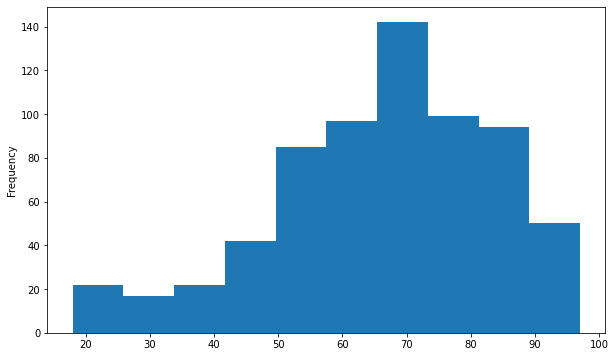

In [14]:
plt.figure(figsize=(10, 6))
df['age'].plot.hist()

# MIMIC-IV Dataset

In [6]:
import os

In [13]:
# we study the clinical data used.

# our topic will be more related to abnormality detection and the clinical features used for radiologists to generate 
# and the information related to radiologists. (eye tracking or)



os.path.isdir(os.path.join("E:\physionet.org", "files"))

True

In [28]:
# tables to analysis.

patient_df = pd.read_csv("E:\physionet.org\\files\\mimiciv\\2.0\\hosp\\patients.csv.gz")

In [29]:
patient_df.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


In [31]:
len(patient_df)

315460

In [30]:
sum(patient_df['dod'].isnull() == False)

30636

In [33]:
sum(patient_df['dod'].isnull() == False) / len(patient_df) * 100

9.711532365434604

In [ ]:
# analysis the gender and age, among these patients,

In [ ]:
# use gender and compare the gender with the one who has more 

In [26]:
sum(admin_df['deathtime'].isnull() == False)


# the first thing is to analysis the dataset in depth.

# especially the table we will use.

# the next table will be "patient"



9087

In [ ]:
# 9087 deaths have been recorded in the

# MIMIC-IV-ED Dataset

# MIMIC-IV CXR Dataset

In [ ]:
# mention the labler (NegBio and CheXpert) used for generating the label, and use those labels to analysis the dataset.
# the metadata will be the table used mostly.

# REFLACX Dataset